<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('MCD.csv')
data.head()

,Crash Date/Time,Route Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,...,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems
0,1/3/2024 14:55,NaN,OPPOSITE DIRECTION SIDESWIPE,CLOUDY,NaN,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,Yes,...,MOVING CONSTANT SPEED,South,South,0,No,No,2017,LEXUS,SUV,NO MISUSE
1,12/16/2023 12:36,Maryland (State),STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NONE DETECTED,No,...,MOVING CONSTANT SPEED,North,West,35,No,No,2010,TOYT,PRIUS,NO MISUSE
2,12/29/2023 12:00,Maryland (State),SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,No,...,MOVING CONSTANT SPEED,South,South,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE
3,11/5/2023 21:07,Maryland (State),SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,NaN,No,...,MOVING CONSTANT SPEED,South,South,40,No,No,2019,DODGE,CHARGER,NO MISUSE
4,11/18/2023 0:40,Maryland (State),SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,YIELD SIGN,NONE DETECTED,NaN,Yes,...,MOVING CONSTANT SPEED,North,North,20,No,No,2014,NISSAN,ROGUE,NaN


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


### Brief description of the data set

This dataset contains information about car crashes in City of New York. Original source: https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes

It has 28 columns (mostly categorical) describing conditions of 138632 car crashes registered in New York last year. Such as Weather, time, type of accident, car direction etc.

### Main objective of the analysis

I'll try to analyze this dataset to find out whether there are certain conditions that influence car crash probability at certain speed limit, or not.
Regression model should be able to predict unsafe speed limit at which met conditions would result into crash.
Although this dataset somewhat biased, because it contains only 'crashed' instances of data, it still allows to predict said unsafe speed limit.

In [4]:
data.columns

Index(['Crash Date/Time', 'Route Type', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems'],
      dtype='object')

In [5]:
data.shape

(172105, 28)

# 2. Objectives


Using this dataset, I'll try to build a regression model predicting speed limit at which car crash probably will occur, depending of different conditions.

To build this regression I'll use sklearn modules 'Lasso', 'Ridge' and 'Linear' regressions, and use knowledge obtained in this Machine Learning course.

# 3. Linear Regression Models


### Data exploration steps

Since almost all columns of this dataset contain categorical data, I'll not do dataset's statistical describe. Instead I'll handle Missing and placeholder Values, as those are most significant in categorized exploration.
Regarding of column I'll either replace such values with most frequent or default values, or drop those rows.
Also most irrelevant columns would also be removed.

Then I'll encode categorical values using get_dummies method and use scikit learn PCA to shrink resulting dataframe dimensions.

In [6]:
missed = data.isnull().sum().sort_values(ascending=False).to_frame()
missed[missed[0]>0]

,0
Non-Motorist Substance Abuse,167788
Circumstance,140746
Equipment Problems,34141
Driver Substance Abuse,31324
Traffic Control,25469
Surface Condition,20118
Route Type,16973
Weather,13354
Drivers License State,9950
Vehicle Going Dir,2689


In [203]:
clean_data = data.copy()

clean_data["Non-Motorist Substance Abuse"].fillna("NONE DETECTED", inplace = True)
clean_data[["Circumstance", "Equipment Problems", "Traffic Control", "Weather", "Collision Type"]] = clean_data[["Circumstance", "Equipment Problems", "Traffic Control", "Weather", "Collision Type"]].fillna("N/A")
clean_data["Driver Substance Abuse"].fillna("NONE DETECTED", inplace = True)
clean_data["Surface Condition"].fillna("DRY", inplace = True)
clean_data.drop(["Route Type", "Drivers License State"], axis=1, inplace = True)
vg_mostf = clean_data["Vehicle Going Dir"].value_counts().index[0]
vc_mostf = clean_data["Vehicle Continuing Dir"].value_counts().index[0]
clean_data["Vehicle Going Dir"].replace("Unknown", vg_mostf, inplace = True)
clean_data["Vehicle Going Dir"].fillna(vg_mostf, inplace = True)
clean_data["Vehicle Continuing Dir"].replace("Unknown", vc_mostf, inplace = True)
clean_data["Vehicle Continuing Dir"].fillna(vc_mostf, inplace = True)
clean_data.dropna(subset=["Vehicle Body Type", "Vehicle Body Type", "Light", "Vehicle Movement", "Vehicle Damage Extent", "Vehicle Second Impact Location", "Vehicle First Impact Location", "Vehicle Model", "Vehicle Make"], inplace = True)

# replace missed speed limit with mean value
clean_data["Speed Limit"].replace(0, clean_data["Speed Limit"].mean())

clean_data.shape

(167123, 26)

In [204]:
# let's extract crash hour from datetime column
clean_data['Crash Date/Time'] = pd.to_datetime(clean_data['Crash Date/Time'])
clean_data['Hour'] = clean_data['Crash Date/Time'].dt.hour

In [205]:
# Get rid of irrelevant columns to decrease dimensionality
clean_data.drop(['Collision Type', 'Crash Date/Time', 'Injury Severity', 'Circumstance', 'Vehicle Model', 'Vehicle Make', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Parked Vehicle'], axis=1, inplace = True)
clean_data.shape

(167123, 17)

In [206]:
# Now let's encode categorical values
encode_cols = clean_data.dtypes[clean_data.dtypes == object].index.tolist() 

cat_data = pd.get_dummies(data=clean_data, columns = encode_cols)
cat_data['Hour'] = clean_data['Hour']
cat_data['Vehicle Year'] = clean_data['Vehicle Year']
cat_data.columns

Index(['Speed Limit', 'Vehicle Year', 'Hour',
       'Weather_BLOWING SAND, SOIL, DIRT', 'Weather_BLOWING SNOW',
       'Weather_CLEAR', 'Weather_CLOUDY', 'Weather_FOGGY', 'Weather_N/A',
       'Weather_OTHER',
       ...
       'Equipment Problems_BELT(S) MISUSED',
       'Equipment Problems_BELTS/ANCHORS BROKE',
       'Equipment Problems_FACING WRONG WAY', 'Equipment Problems_N/A',
       'Equipment Problems_NO MISUSE', 'Equipment Problems_NOT STREPPED RIGHT',
       'Equipment Problems_OTHER', 'Equipment Problems_SIZE/TYPE IMPROPER',
       'Equipment Problems_STRAP/TETHER LOOSE', 'Equipment Problems_UNKNOWN'],
      dtype='object', length=167)

In [207]:
# In thsi step I'll split dataset into dependent and independent variables
y = cat_data['Speed Limit']
x = cat_data.drop(['Speed Limit'], axis=1)

In [200]:
# Let's see how many resulting features are really add variance up to 95%
pca = PCA()
x = StandardScaler().fit_transform(x)
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
feat_num = np.argmax(cumsum >=0.95) + 1
feat_num

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


137

In [201]:
# Next I'll take those most correlated features for the model
features = cat_data.corr()['Speed Limit'].abs().sort_values(ascending=False)
rel_features = features.head(feat_num).index.tolist() 
rel_features

['Speed Limit',
 'Vehicle Movement_BACKING',
 'Traffic Control_TRAFFIC SIGNAL',
 'Vehicle Movement_PARKED',
 'Vehicle Movement_PARKING',
 'Vehicle Movement_STARTING FROM PARKED',
 'Driver Substance Abuse_UNKNOWN',
 'Traffic Control_N/A',
 'Vehicle Movement_SLOWING OR STOPPING',
 'Vehicle Movement_MOVING CONSTANT SPEED',
 'Driver At Fault_No',
 'Driver Substance Abuse_NONE DETECTED',
 'Equipment Problems_UNKNOWN',
 'Driver At Fault_Yes',
 'Equipment Problems_NO MISUSE',
 'Surface Condition_WET',
 'Surface Condition_DRY',
 'Driver Distracted By_NOT DISTRACTED',
 'Traffic Control_NO CONTROLS',
 'Vehicle Continuing Dir_North',
 'Vehicle Going Dir_North',
 'Vehicle Body Type_SCHOOL BUS',
 'Vehicle Going Dir_South',
 'Vehicle Continuing Dir_South',
 'Driver Distracted By_UNKNOWN',
 'Light_UNKNOWN',
 'Traffic Control_STOP SIGN',
 'Vehicle Movement_CHANGING LANES',
 'Vehicle Movement_OTHER',
 'Vehicle Movement_STOPPED IN TRAFFIC LANE',
 'Weather_UNKNOWN',
 'Vehicle Body Type_PASSENGER CAR',
 '

<AxesSubplot:>

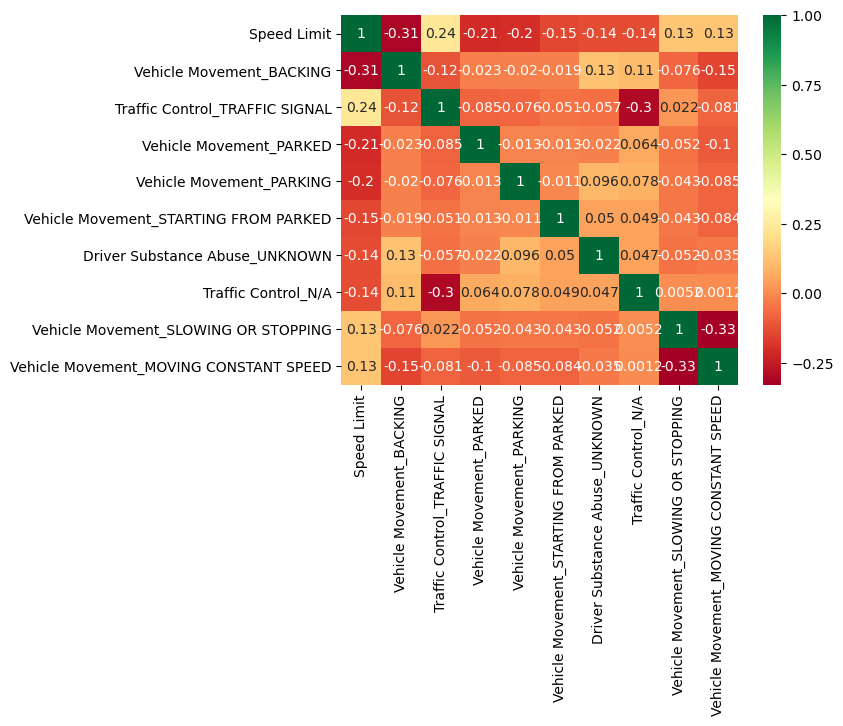

In [209]:
# Plot a heatmap for 10 most correlated features
sns.heatmap(cat_data[rel_features[0:10]].corr(),annot=True,cmap='RdYlGn')

### Brief summary of data exploration

After dealing with missing values, dataset features count increased to 167 items.

To avoid overfitting I redused those dimensions using PCA module, which left 136 most relevant independent (and one dependent) features describing 95% of dataset variance

In [210]:
sel_data = cat_data[rel_features]
sel_data.shape

(167123, 137)

In [211]:
# Finally, let's split resulting dataset
y = sel_data['Speed Limit']
x = sel_data.drop(['Speed Limit'], axis=1)

x = StandardScaler().fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [213]:
# Let's create our model using Lasso regression
las = Lasso(alpha = 0.0001)
las.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [214]:
y_pred = las.predict(X_test)
lscore = r2_score(y_test, y_pred)
lscore

0.303495257314256

In [215]:
# Now let's try same with Ridge regression
rid = Ridge(alpha = 0.001)
rid.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [216]:
y_pred = rid.predict(X_test)
rscore = r2_score(y_test, y_pred)
rscore

0.3034992929682614

In [226]:
# Third one will be Linear Regression from sklearn module
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [227]:
y_pred = lr.predict(X_test)
lrscore = r2_score(y_test, y_pred)
lrscore

0.30351872615436126

(0.3034, 0.3036)

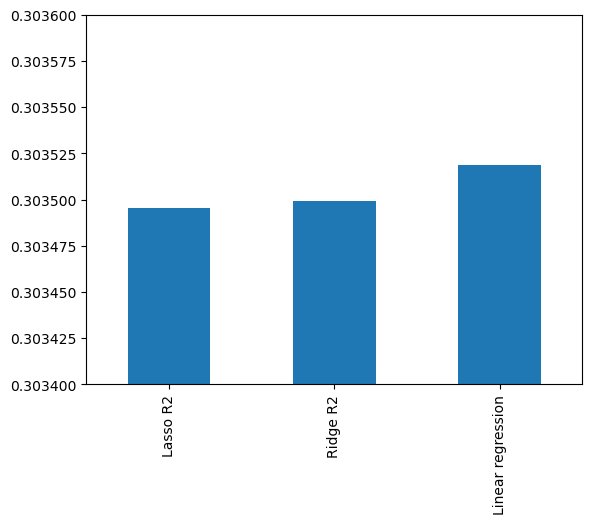

In [231]:
# Plot Lasso and Ridge scores
rs = pd.DataFrame([lscore, rscore,lrscore])
rs.index = ['Lasso R2', 'Ridge R2', 'Linear regression']
ax = rs.plot(kind='bar', legend=False, label=0)
ax.set_ylim(0.3034,0.3036)

### Summary of training

As we see both Lasso and Ridge regressions give almost same determination coeff R-squared ~0.3. Linear regression performs slightly better, but this difference is not significant.

Though regression R2 values are not ideal for all three of them, those are still have statistical significance above random noise level. Using any of models we can do:
1. Find most relevant features which correlated with the crash at given speed limit
2. Predict speed limit at which car crash could occur while certain conditions are met

### Recommend model

Honestly, all three models give similar results, thus, any of them could be used. Bus since Linear Regression has shown best results of all, I'll recommend using it.
It can explain impact of all its features and has meaningful order of them, as we'll see below.

# 4. Insights and key findings


In [221]:
# Here are 3 most significant conditions which accumulate probability of crar crash if met
print(rel_features[1:4])

['Vehicle Movement_BACKING', 'Traffic Control_TRAFFIC SIGNAL', 'Vehicle Movement_PARKED']


As we can see, most relevant features regarding car crashes are: vehicle moving backward, traffic signal violation and damage of parked cars. All those make sense and give certain amount of prediction of speed limit at which said features will result in car crash.

Also, though day time intuitively seems relevant to car crash probability (I expected that more crashes on higher speed limit would occur at night) it is not as significant as expected among other features.

In [222]:
print ("Day time significance is {0} out of {1}.".format(rel_features.index('Hour'), np.size(rel_features)))

Day time significance is 72 out of 137.


# 5. Next Steps


At next step it might be useful to utilize date values by categorizing it to 'Weekend'/'Non-weekend' or 'Holiday'/'Non-holiday' categories. Also, it might be useful to see whether columns which were excluded as non-relevant by bias, contain significant data or not.

Although, dataset contains enough rows to estimate features degree of freedom as statistically significant, it might be useful to collect and add up more recent data and reevaluate the model after some time.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
